# Breve explicación de la notebook

El objetivo de esta Notebook es preparar los datos para evaluar el comportamiento del modelo a medida que se entrena con una cantidad de imágenes cada vez menor. 

# Montaje e importación de librerías.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/TESIS_Eugenia_Berrino

In [3]:
%cd /content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino

/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino


In [4]:
import pandas as pd
import numpy as np
import os
from skimage.io import imread
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 

# Importación DS - 17.438 Imágenes
Lo primero que hacemos es importar el DS de train utilizado originalmente para el entrenamiento. Este DS consta de 17.438 imágenes.

In [5]:
df4 = pd.read_excel("train0-7.xlsx")

In [ ]:
len(df4)

17438

# Como funciona el modelo con las proporciones de imagenes iniciales pero en menor cantidad
 Para eso, usamos un Train test split debido a que es capaz de estratificar las imágenes (manteniendo las proporciones entre los diferentes grupos). La manera en la que disminuimos el tamaño es mediante el parámetro test_size. El mismo es un número entre 0 y 1 que nos dice la proporción de imágenes que serán descartadas. Por lo tanto, si quiero conservar el 20% de los datos, debo definir test_size = 0.8.

#64% del DS de Train - 11.160 Imágenes
En este caso, en realidad se toma el DS de train y a ese se le descarta el 20%.El DS de Train ya representaba el 80% de los datos. Entonces, en este caso, nos estamos quedando con el 64% del DS de train.

In [ ]:
0.8*0.8

0.6400000000000001

###Discard

In [ ]:
(X_keep, X_discard, y_keep, y_discard) = train_test_split(df4[['ImageID','ImageDir']].to_numpy(),df4['Projection'].to_numpy(),test_size=0.2,random_state=42,stratify=df4['Projection'].to_numpy())

###Train - Test Split

In [ ]:
(X_train_valid, X_test, y_train_valid, y_test) = train_test_split(X_keep,y_keep,test_size=0.2,random_state=42,stratify=y_keep)

In [ ]:
X_train_valid

array([['7/16061715141617450674588701927310938317_svflxu.png', 7],
       ['3/167930323439701518329984338991846611228_f6xw8w.png', 3],
       ['2/233870006284953785247313127940550356145_ri9ah5.png', 2],
       ...,
       ['3/237942950128157837009692523374744999836_k0y1i5.png', 3],
       ['5/204704557321859872576468601959040452580_-506mm.png', 5],
       ['0/89953013520890832443277904553619015330_7xpk7l.png', 0]],
      dtype=object)

In [ ]:
len(X_train_valid)

11160

In [ ]:
X_test

array([['5/80594056392541670009761024758582564052_pnlaq8.png', 5],
       ['5/322063069776874464195948988310466174649_cny56w.png', 5],
       ['1/326411985594097468777428009337769405422_v4qzja.png', 1],
       ...,
       ['2/257057325705045133930619956592667846957_3qfedt.png', 2],
       ['1/112180397242119249997520578956434384798_614cpg.png', 1],
       ['1/289374031859151323421880068826251037683_0jr6gj.png', 1]],
      dtype=object)

In [ ]:
y_test

array(['L', 'PA', 'PA', ..., 'L', 'PA', 'L'], dtype=object)

###Guardado 

In [ ]:
df_train = pd.DataFrame({'ImageID':X_train_valid[:,0], 'Projection':y_train_valid})
df_test = pd.DataFrame({'ImageID':X_test[:,0], 'Projection':y_test})

In [ ]:
#df_train["ImageID"]= df_train["ImageDir"].astype('str').str.cat(df_train["ImageID"], sep ="/")
#df_test["ImageID"] = df_test["ImageDir"].astype('str').str.cat(df_test["ImageID"], sep ="/")

In [ ]:
df_test.head()

ImageID Projection
0  7/114395451466222503977571625173805526502_pv58...          L
1  6/306312582527525564029302484240461220349_mh3r...          L
2  7/68590885858077014762550242136270047931_2_lmi...         PA
3  1/321931831171643981981781293733800568910_jpja...          L
4  0/66213201756927956963062153040402208754_eob3j...         PA

In [ ]:
df_train.to_excel("train0-7_80%.xlsx")
# No nos interesa crear un dataset de test, porque vamos a usar el mismo para poder comparar resultados de los disintos modelos.
#df_test.to_excel("test0-7_80%.xlsx")

#10% del DS de Train - 1812 Imágenes

In [ ]:
1-0.13

0.87

In [ ]:
0.8*0.13

0.10400000000000001

##Discard

In [ ]:
(X_keep, X_discard, y_keep, y_discard) = train_test_split(df4[['ImageID','ImageDir']].to_numpy(),df4['Projection'].to_numpy(),test_size=0.87,random_state=42,stratify=df4['Projection'].to_numpy())

##Train - Test Split

In [ ]:
(X_train_valid, X_test, y_train_valid, y_test) = train_test_split(X_keep,y_keep,test_size=0.2,random_state=42,stratify=y_keep)

In [ ]:
X_train_valid

array([['0/188627314351498178666518971360904019313_xc9q8e.png', 0],
       ['0/47752435908500846478375668214287389672_xlc9jc.png', 0],
       ['4/333186304038414988664638581231289312664_bh3eky.png', 4],
       ...,
       ['4/142546742450309641046056784966989081010_f6h3kp.png', 4],
       ['5/25151869792930431922750417178242113450_oyqjmf.png', 5],
       ['5/166485964846227252210329351715712133241_wvc2n9.png', 5]],
      dtype=object)

In [ ]:
len(X_train_valid)

1812

##Guardado

In [ ]:
df_train = pd.DataFrame({'ImageID':X_train_valid[:,0], 'Projection':y_train_valid})
df_test = pd.DataFrame({'ImageID':X_test[:,0], 'Projection':y_test})

In [ ]:
df_test.head()

ImageID Projection
0  6/304188297016116459278912974209283257710_awsx...          L
1  7/138204624763378483047346428306352518841_s0ga...          L
2  2/231779677090102348217464859449304617573_b9nu...         PA
3  7/221916767715513369240940468775288464229_40mr...         PA
4  0/32984067162293851477953321590068608041_ajmom...         PA

In [ ]:
df_train.to_excel("train0-7_10%.xlsx")

#5% del DS de Train - 906 Imágenes


In [ ]:
df10 = pd.read_excel("train0-7_10%.xlsx")

In [ ]:
df10

Unnamed: 0                                            ImageID Projection
0              0  0/188627314351498178666518971360904019313_xc9q...         PA
1              1  0/47752435908500846478375668214287389672_xlc9j...          L
2              2  4/333186304038414988664638581231289312664_bh3e...         PA
3              3  4/169216422286594896142492577323138568036_y629...         PA
4              4  5/121728788070661853503884447081041826615_1g6u...         PA
...          ...                                                ...        ...
1807        1807  5/248388890269046099862217219087098089169_lyez...         PA
1808        1808  0/145448382018818506049549898101970722974_me1j...         PA
1809        1809  4/142546742450309641046056784966989081010_f6h3...          L
1810        1810  5/25151869792930431922750417178242113450_oyqjm...         PA
1811        1811  5/166485964846227252210329351715712133241_wvc2...          L

[1812 rows x 3 columns]

##Discard
En este caso, queremos mantener la mitad del DS generado con 10%, por lo tanto, solamente usamos un train_test_split, que separe entre las imágenes que queremos y las que queremos descartar. 

In [ ]:
(X_train_valid, X_discard, y_train_valid, y_discard) = train_test_split(df10[['ImageID']].to_numpy(),df10['Projection'].to_numpy(),test_size=0.5,random_state=42,stratify=df10['Projection'].to_numpy())

In [ ]:
len(X_train_valid)

906

##Guardado

In [ ]:
df_train = pd.DataFrame({'ImageID':X_train_valid[:,0], 'Projection':y_train_valid})
df_train.head()

ImageID Projection
0  7/123509765659159945117768409128684393390_h8y6...          L
1  3/231990409739449773171619437843293105072_lvq1...         PA
2  0/171556666526013956421543231811856775277_ptsa...         PA
3  2/90270320660863534937325219386690193743_bxxow...         PA
4  3/100640384508558964776507219895956147931_71e4...          L

In [ ]:
df_train.to_excel("train0-7_5%.xlsx")

# 20 imágenes por clase, no balanceadas manteniendo el 5%, 32% y 63%, 407 Imágenes (2.5% del DS)

Queremos ver si somos capaces de generar un modelo que consiga clasificar con 20 imágenes de AP horizontal y sus equivalentes en cantidades de las otras clases.

In [ ]:
254+133+20

407

In [ ]:
df_ = pd.read_excel("train0-7.xlsx")

In [ ]:
# Importamos todo el DS de train.
df_train

### Tomamos imágenes PA

In [ ]:
PA_df = df_train.loc[df_train['Projection'] == 'PA'] 


In [ ]:
PA_df

ImageID Projection
0     0/188627314351498178666518971360904019313_xc9q...         PA
2     4/333186304038414988664638581231289312664_bh3e...         PA
3     4/169216422286594896142492577323138568036_y629...         PA
4     5/121728788070661853503884447081041826615_1g6u...         PA
5     6/327485422375748893477885234430001528891_5irp...         PA
...                                                 ...        ...
1805  7/338441406229338818604724020336950635124_n9ev...         PA
1806  6/250618647305259151483177107788824962369_8lk6...         PA
1807  5/248388890269046099862217219087098089169_lyez...         PA
1808  0/145448382018818506049549898101970722974_me1j...         PA
1810  5/25151869792930431922750417178242113450_oyqjm...         PA

[1129 rows x 2 columns]

In [ ]:
# Tomamos 20 imágenes 
PA_254 = PA_df.sample(n=254)
PA_254

ImageID Projection
1371  1/58306017006945754446277618845324178321_ml4xw...         PA
1633  2/24172542304474387232362744623755234934_x7fca...         PA
1309  4/239786077803334233176769097529623721105_2_vh...         PA
1089  3/286618087603253413253659974601588632723_6r67...         PA
882   2/321956562134190997249011971644620627879_pgbs...         PA
225   7/64010987757113311188477319058510127795_uhqql...         PA
1626  0/233202571007896468640039430513757759224_878g...         PA
1188  5/309825252381642289575259797763261816840_lfpq...         PA
377   3/209259389550926441729241739796844356144_di8t...         PA
954   3/255474178290399456081769959183399359390_qt9o...         PA
1063  6/293066557361398563787176095659856406990_mqmc...         PA
1307  5/202534082636596470065331988488726632893_w387...         PA
368   4/169632385654436838908372257983342217197_vtub...         PA
985   3/88417106681724556062448257945738428702_5qztm...         PA
1062  7/73716946334984550805271160265186275219_juz16...         PA
570   3/328483568345905472936813349787026840965_sw2j...         PA
1403  0/126285693481594194255244003469424468073_fk3y...         PA
1231  0/232538572936349033119391992225488992653_qlcz...         PA
214   2/108649002010545187308127342016048932200_qzjn...         PA
408   4/48296714751426622210848115417696716439_evfz8...         PA

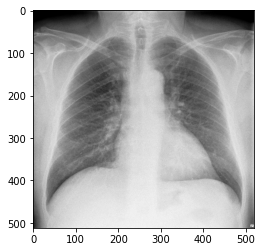

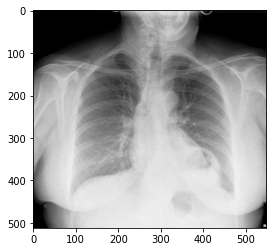

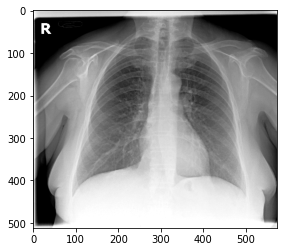

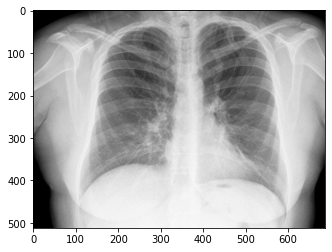

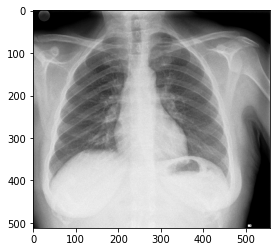

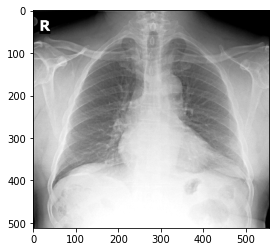

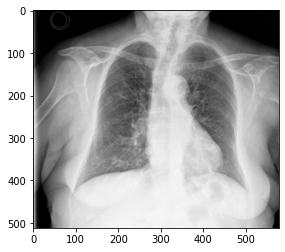

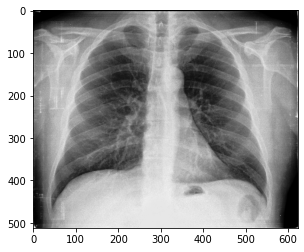

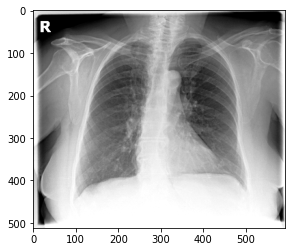

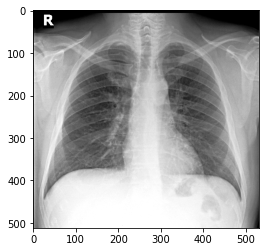

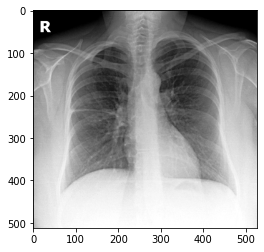

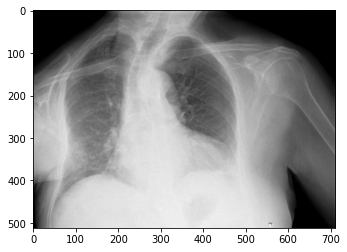

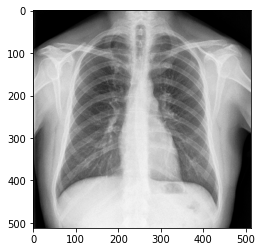

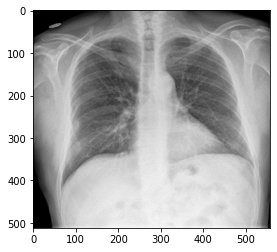

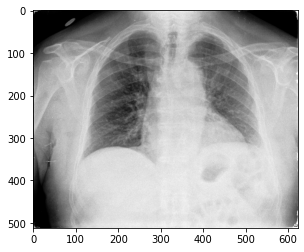

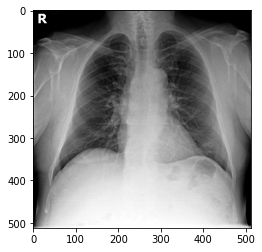

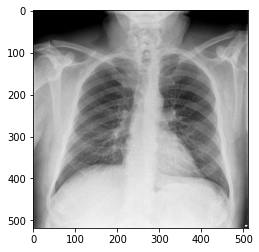

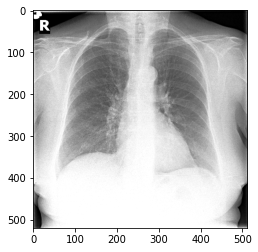

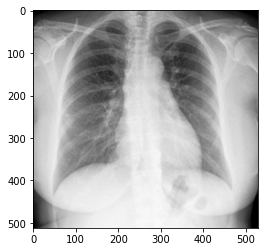

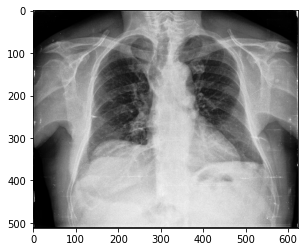

In [ ]:
# Revisamos que las imágenes que vayamos a usar se encuentren bien etiquetadas.
for index, row in PA_254.iterrows():
  path_read = '/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/DS_comp_nodef/' + row["ImageID"]
  plt.figure()
  imagen = imread(path_read)
  plt.imshow(imagen[:,:,1],cmap=plt.cm.Greys_r)
  #print('Ground Truth: '+ APh_20["Projection"].values[ROW]+'\n')

## Tomamos imágenes L 

In [ ]:
L_df = df_train.loc[df_train['Projection'] == 'L'] 
L_df

ImageID Projection
1     0/47752435908500846478375668214287389672_xlc9j...          L
7     7/2581127969815248556702092230288115109_kbfxf8...          L
10    0/214260817085057432303623958907855926368_jrl2...          L
16    3/280261408477083197276055345183871089917_l0if...          L
19    4/81130766855154229200737212684330389325_1hk5q...          L
...                                                 ...        ...
1797  1/77220469449720429959389780654617849671_b8fkd...          L
1799  1/187176174383149498730004982265375244328_aw8z...          L
1803  6/145639913184458966308972563366021361019_kz20...          L
1809  4/142546742450309641046056784966989081010_f6h3...          L
1811  5/166485964846227252210329351715712133241_wvc2...          L

[593 rows x 2 columns]

In [ ]:
L_133 = L_df.sample(n=133)
L_133

ImageID Projection
1774  4/337362040087961836225924527526391424669_qy74...          L
697   0/313827364452531661330025984234136435818_5k60...          L
1722  0/158127965063113306992304369857531130990_6hpu...          L
198   2/70158017463755750194941279877145533585_sdzrm...          L
1250  4/87054857490246991263619872462266062078_y9lan...          L
1499  4/244855916439834919996874660376379004373_d1ws...          L
1178  5/64550046317670683092124225544892969611_fhb60...          L
43    4/204111647772535252016621731006141696493_da7z...          L
120   5/143995745737064565266633840356750650163_yd4l...          L
1261  3/288745458124741489037822821073674992311_4o7e...          L
604   1/43977068427359067502836471650954197674_ykgb1...          L
498   1/13489016033396205963125693115200264909_bhqr4...          L
1166  4/233966217429259944028369174893672309030_go58...          L
557   5/19467767735516935687644067253699300456_vmpob...          L
831   3/197127572062828437501384515648192402883_5znk...          L
828   6/269810828975397326410884114457790875929_qzim...          L
867   7/101651367393208371957602619301341709589_6a2u...          L
514   6/207848817683321671211546429872059662498_quxm...          L
702   3/171766980876975733488381740945496977817_d35g...          L
730   3/212670653869102736403169559555949358934_e5wt...          L

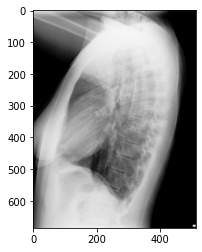

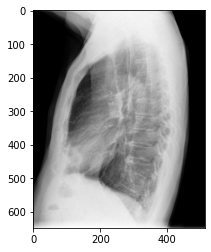

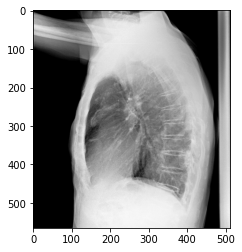

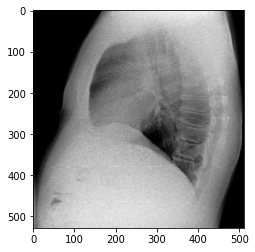

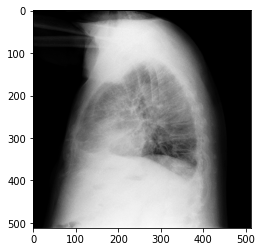

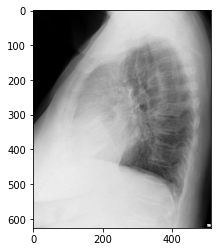

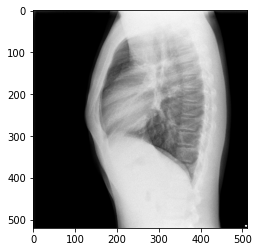

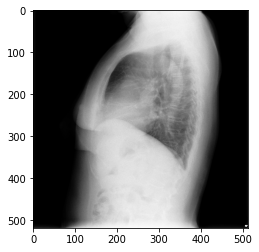

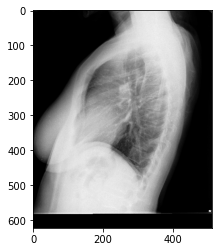

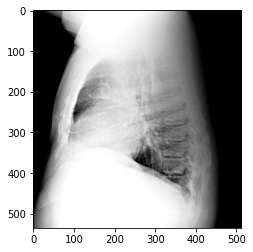

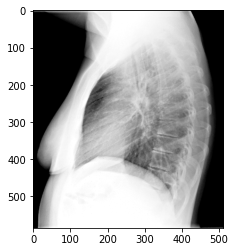

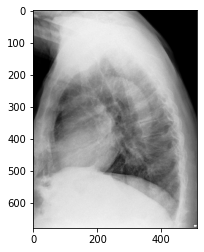

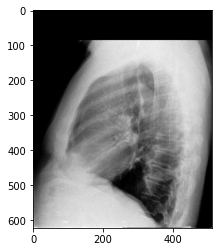

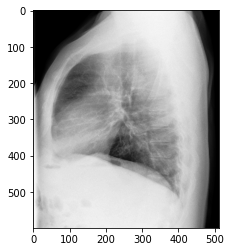

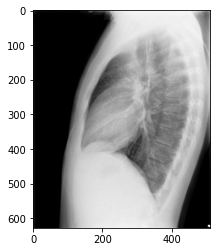

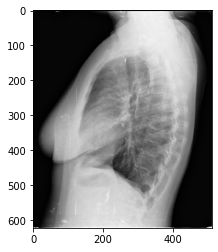

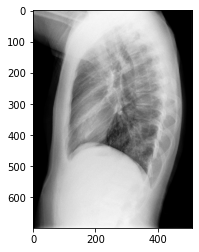

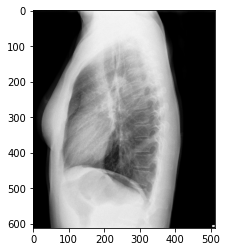

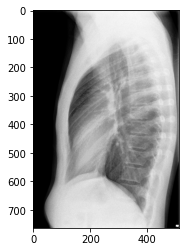

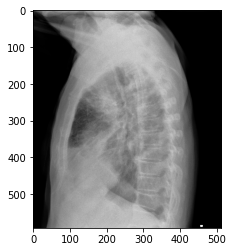

In [ ]:
for index, row in L_133.iterrows():
  path_read = '/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/DS_comp_nodef/' + row["ImageID"]
  plt.figure()
  imagen = imread(path_read)
  plt.imshow(imagen[:,:,1],cmap=plt.cm.Greys_r)
  #print('Ground Truth: '+ APh_20["Projection"].values[ROW]+'\n')

## Tomamos imágenes AP_h

In [ ]:
APh_df = df_train.loc[df_train['Projection'] == 'AP_horizontal'] 
APh_df

ImageID     Projection
26    4/286169633034596533207586178311316212282_j51h...  AP_horizontal
29    7/118770727299037375036263127485192008864_vz5w...  AP_horizontal
64    4/330288557977063360025136616474484990880_-5bl...  AP_horizontal
95    0/318086149697052829271543112791466683829_vwhd...  AP_horizontal
100   2/123712523100765794645614847095842998737_ww81...  AP_horizontal
...                                                 ...            ...
1680  0/21622763272843446438588439312086001028_2h8di...  AP_horizontal
1700  7/64004059739464758343561280022754186282_2wagh...  AP_horizontal
1753  5/119777270630252129092224435609175000360_6vf7...  AP_horizontal
1766  0/148808555610197866737270919680299101805_o7n5...  AP_horizontal
1769  0/250538383336488089851272840069475450672_7ebt...  AP_horizontal

[90 rows x 2 columns]

In [ ]:
APh_20 = APh_df.sample(n=20)
APh_20

ImageID     Projection
727   5/231969939532557030804928038748143359750_2_rh...  AP_horizontal
1092  5/50542036180306227702402727079122326015_dincn...  AP_horizontal
624   6/283259706623662939553700512914435735471_7e02...  AP_horizontal
210   4/219774689872399980981022253022147769163_2_l8...  AP_horizontal
326   7/180496455270990804585400695026823497506_z9ih...  AP_horizontal
671   0/152578842912245459030702367323123419528_2_0q...  AP_horizontal
663   7/76513127719686435364473705219195140474_98ia2...  AP_horizontal
921   5/206385080967364591572548895312312178682_4nih...  AP_horizontal
1308  2/108024141995303850873030711771860111788_f1i0...  AP_horizontal
260   3/80892103765298639179355367939072990569_5we57...  AP_horizontal
1212  2/263616054472400143496055926781341772722_ejyi...  AP_horizontal
997   7/269386373475571283807707255823628336214_rb6c...  AP_horizontal
1299  4/32774732091504826672989904671953153241_1pp28...  AP_horizontal
1434  7/256147461567021768242019164610152996079-4_0h...  AP_horizontal
200   3/332930284364188157784817132419812957739_2_fo...  AP_horizontal
474   5/46648248924195590055502779116843598696_t5kev...  AP_horizontal
1570  5/280674558173639782820818257817573831888_opcu...  AP_horizontal
392   0/133366959714202786380043498487399521163_4fgk...  AP_horizontal
26    4/286169633034596533207586178311316212282_j51h...  AP_horizontal
1473  3/16742654447337329545240810239863888745_2_9l4...  AP_horizontal

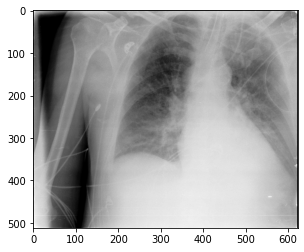

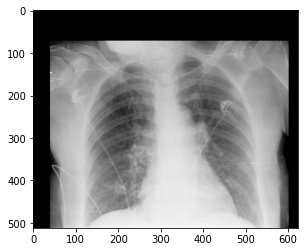

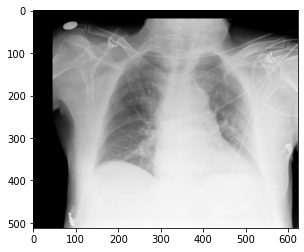

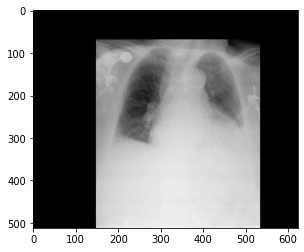

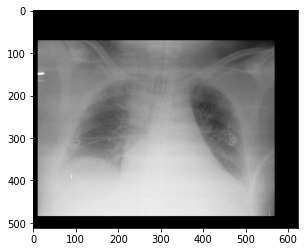

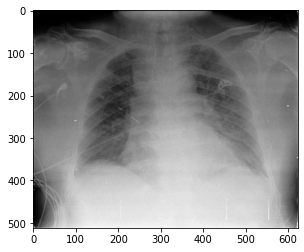

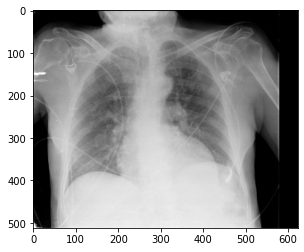

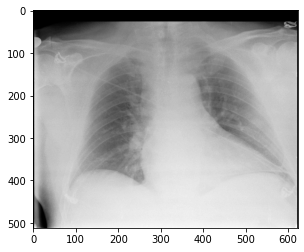

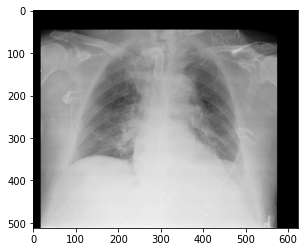

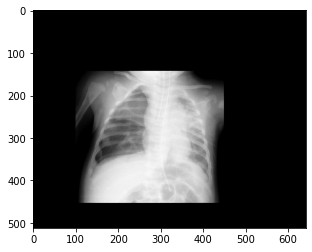

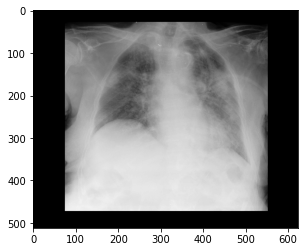

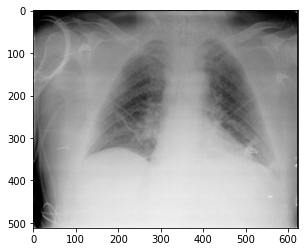

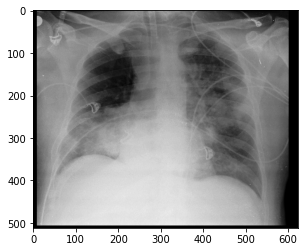

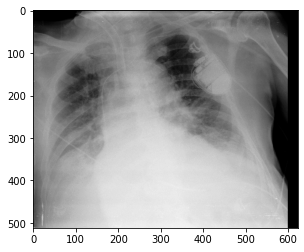

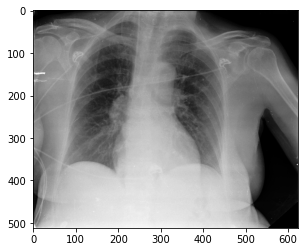

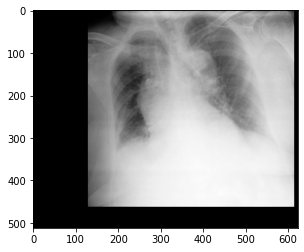

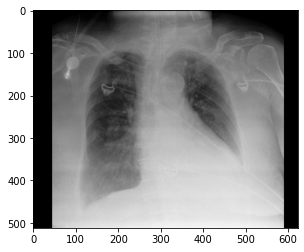

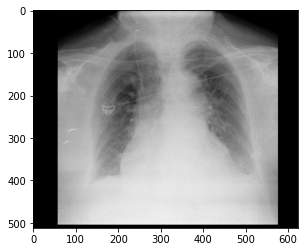

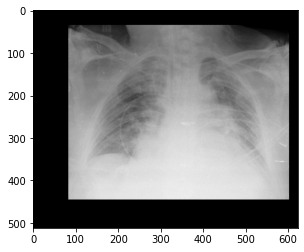

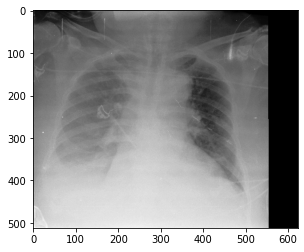

In [ ]:
for index, row in APh_20.iterrows():
  path_read = '/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/DS_comp_nodef/' + row["ImageID"]
  plt.figure()
  imagen = imread(path_read)
  plt.imshow(imagen[:,:,1],cmap=plt.cm.Greys_r)
  #print('Ground Truth: '+ APh_20["Projection"].values[ROW]+'\n')

##Concatenado, Shuffling, Guardado

In [ ]:
s20__nobal_df = pd.concat([PA_20, L_20, APh_20])
s20_nobal_df

ImageID     Projection
1371  1/58306017006945754446277618845324178321_ml4xw...             PA
1633  2/24172542304474387232362744623755234934_x7fca...             PA
1309  4/239786077803334233176769097529623721105_2_vh...             PA
1089  3/286618087603253413253659974601588632723_6r67...             PA
882   2/321956562134190997249011971644620627879_pgbs...             PA
225   7/64010987757113311188477319058510127795_uhqql...             PA
1626  0/233202571007896468640039430513757759224_878g...             PA
1188  5/309825252381642289575259797763261816840_lfpq...             PA
377   3/209259389550926441729241739796844356144_di8t...             PA
954   3/255474178290399456081769959183399359390_qt9o...             PA
1063  6/293066557361398563787176095659856406990_mqmc...             PA
1307  5/202534082636596470065331988488726632893_w387...             PA
368   4/169632385654436838908372257983342217197_vtub...             PA
985   3/88417106681724556062448257945738428702_5qztm...             PA
1062  7/73716946334984550805271160265186275219_juz16...             PA
570   3/328483568345905472936813349787026840965_sw2j...             PA
1403  0/126285693481594194255244003469424468073_fk3y...             PA
1231  0/232538572936349033119391992225488992653_qlcz...             PA
214   2/108649002010545187308127342016048932200_qzjn...             PA
408   4/48296714751426622210848115417696716439_evfz8...             PA
1774  4/337362040087961836225924527526391424669_qy74...              L
697   0/313827364452531661330025984234136435818_5k60...              L
1722  0/158127965063113306992304369857531130990_6hpu...              L
198   2/70158017463755750194941279877145533585_sdzrm...              L
1250  4/87054857490246991263619872462266062078_y9lan...              L
1499  4/244855916439834919996874660376379004373_d1ws...              L
1178  5/64550046317670683092124225544892969611_fhb60...              L
43    4/204111647772535252016621731006141696493_da7z...              L
120   5/143995745737064565266633840356750650163_yd4l...              L
1261  3/288745458124741489037822821073674992311_4o7e...              L
604   1/43977068427359067502836471650954197674_ykgb1...              L
498   1/13489016033396205963125693115200264909_bhqr4...              L
1166  4/233966217429259944028369174893672309030_go58...              L
557   5/19467767735516935687644067253699300456_vmpob...              L
831   3/197127572062828437501384515648192402883_5znk...              L
828   6/269810828975397326410884114457790875929_qzim...              L
867   7/101651367393208371957602619301341709589_6a2u...              L
514   6/207848817683321671211546429872059662498_quxm...              L
702   3/171766980876975733488381740945496977817_d35g...              L
730   3/212670653869102736403169559555949358934_e5wt...              L
727   5/231969939532557030804928038748143359750_2_rh...  AP_horizontal
1092  5/50542036180306227702402727079122326015_dincn...  AP_horizontal
624   6/283259706623662939553700512914435735471_7e02...  AP_horizontal
210   4/219774689872399980981022253022147769163_2_l8...  AP_horizontal
326   7/180496455270990804585400695026823497506_z9ih...  AP_horizontal
671   0/152578842912245459030702367323123419528_2_0q...  AP_horizontal
663   7/76513127719686435364473705219195140474_98ia2...  AP_horizontal
921   5/206385080967364591572548895312312178682_4nih...  AP_horizontal
1308  2/108024141995303850873030711771860111788_f1i0...  AP_horizontal
260   3/80892103765298639179355367939072990569_5we57...  AP_horizontal
1212  2/263616054472400143496055926781341772722_ejyi...  AP_horizontal
997   7/269386373475571283807707255823628336214_rb6c...  AP_horizontal
1299  4/32774732091504826672989904671953153241_1pp28...  AP_horizontal
1434  7/256147461567021768242019164610152996079-4_0h...  AP_horizontal
200   3/332930284364188157784817132419812957739_2_fo...  AP_horizontal
474   5/46648248924195590055502779116843598696_t5kev...  AP_horizontal
1

In [ ]:
s20_nobal_df = s20_nobal_df.sample(frac=1)
s20_nobal_df

ImageID     Projection
1570  5/280674558173639782820818257817573831888_opcu...  AP_horizontal
1178  5/64550046317670683092124225544892969611_fhb60...              L
408   4/48296714751426622210848115417696716439_evfz8...             PA
120   5/143995745737064565266633840356750650163_yd4l...              L
1473  3/16742654447337329545240810239863888745_2_9l4...  AP_horizontal
326   7/180496455270990804585400695026823497506_z9ih...  AP_horizontal
882   2/321956562134190997249011971644620627879_pgbs...             PA
1231  0/232538572936349033119391992225488992653_qlcz...             PA
1092  5/50542036180306227702402727079122326015_dincn...  AP_horizontal
26    4/286169633034596533207586178311316212282_j51h...  AP_horizontal
1063  6/293066557361398563787176095659856406990_mqmc...             PA
198   2/70158017463755750194941279877145533585_sdzrm...              L
377   3/209259389550926441729241739796844356144_di8t...             PA
498   1/13489016033396205963125693115200264909_bhqr4...              L
368   4/169632385654436838908372257983342217197_vtub...             PA
210   4/219774689872399980981022253022147769163_2_l8...  AP_horizontal
474   5/46648248924195590055502779116843598696_t5kev...  AP_horizontal
604   1/43977068427359067502836471650954197674_ykgb1...              L
200   3/332930284364188157784817132419812957739_2_fo...  AP_horizontal
1062  7/73716946334984550805271160265186275219_juz16...             PA
214   2/108649002010545187308127342016048932200_qzjn...             PA
702   3/171766980876975733488381740945496977817_d35g...              L
671   0/152578842912245459030702367323123419528_2_0q...  AP_horizontal
1434  7/256147461567021768242019164610152996079-4_0h...  AP_horizontal
1212  2/263616054472400143496055926781341772722_ejyi...  AP_horizontal
225   7/64010987757113311188477319058510127795_uhqql...             PA
1308  2/108024141995303850873030711771860111788_f1i0...  AP_horizontal
1188  5/309825252381642289575259797763261816840_lfpq...             PA
1307  5/202534082636596470065331988488726632893_w387...             PA
1371  1/58306017006945754446277618845324178321_ml4xw...             PA
514   6/207848817683321671211546429872059662498_quxm...              L
867   7/101651367393208371957602619301341709589_6a2u...              L
997   7/269386373475571283807707255823628336214_rb6c...  AP_horizontal
1633  2/24172542304474387232362744623755234934_x7fca...             PA
1261  3/288745458124741489037822821073674992311_4o7e...              L
557   5/19467767735516935687644067253699300456_vmpob...              L
260   3/80892103765298639179355367939072990569_5we57...  AP_horizontal
1250  4/87054857490246991263619872462266062078_y9lan...              L
828   6/269810828975397326410884114457790875929_qzim...              L
921   5/206385080967364591572548895312312178682_4nih...  AP_horizontal
1722  0/158127965063113306992304369857531130990_6hpu...              L
1166  4/233966217429259944028369174893672309030_go58...              L
1403  0/126285693481594194255244003469424468073_fk3y...             PA
570   3/328483568345905472936813349787026840965_sw2j...             PA
43    4/204111647772535252016621731006141696493_da7z...              L
624   6/283259706623662939553700512914435735471_7e02...  AP_horizontal
1089  3/286618087603253413253659974601588632723_6r67...             PA
392   0/133366959714202786380043498487399521163_4fgk...  AP_horizontal
697   0/313827364452531661330025984234136435818_5k60...              L
1626  0/233202571007896468640039430513757759224_878g...             PA
730   3/212670653869102736403169559555949358934_e5wt...              L
954   3/255474178290399456081769959183399359390_qt9o...             PA
1499  4/244855916439834919996874660376379004373_d1ws...              L
1299  4/32774732091504826672989904671953153241_1pp28...  AP_horizontal
727   5/231969939532557030804928038748143359750_2_rh...  AP_horizontal
831   3/197127572062828437501384515648192402883_5znk...              L
6

In [ ]:
s20_df.to_excel("train_20imgs_nobal.xlsx")

# 20 imágenes por clase, balanceadas (33% cada clase)

Queremos ver si somos capaces de generar un modelo que consiga clasificar con 20 imágenes de cada clase.

##Importamos DF

In [ ]:
# Importamos todo el DS de train.
df_train

ImageID Projection
0     0/188627314351498178666518971360904019313_xc9q...         PA
1     0/47752435908500846478375668214287389672_xlc9j...          L
2     4/333186304038414988664638581231289312664_bh3e...         PA
3     4/169216422286594896142492577323138568036_y629...         PA
4     5/121728788070661853503884447081041826615_1g6u...         PA
...                                                 ...        ...
1807  5/248388890269046099862217219087098089169_lyez...         PA
1808  0/145448382018818506049549898101970722974_me1j...         PA
1809  4/142546742450309641046056784966989081010_f6h3...          L
1810  5/25151869792930431922750417178242113450_oyqjm...         PA
1811  5/166485964846227252210329351715712133241_wvc2...          L

[1812 rows x 2 columns]

##Tomamos imágenes PA

In [ ]:
PA_df = df_train.loc[df_train['Projection'] == 'PA'] 


In [ ]:
PA_df

ImageID Projection
0     0/188627314351498178666518971360904019313_xc9q...         PA
2     4/333186304038414988664638581231289312664_bh3e...         PA
3     4/169216422286594896142492577323138568036_y629...         PA
4     5/121728788070661853503884447081041826615_1g6u...         PA
5     6/327485422375748893477885234430001528891_5irp...         PA
...                                                 ...        ...
1805  7/338441406229338818604724020336950635124_n9ev...         PA
1806  6/250618647305259151483177107788824962369_8lk6...         PA
1807  5/248388890269046099862217219087098089169_lyez...         PA
1808  0/145448382018818506049549898101970722974_me1j...         PA
1810  5/25151869792930431922750417178242113450_oyqjm...         PA

[1129 rows x 2 columns]

In [ ]:
# Tomamos 20 imágenes 
PA_20 = PA_df.sample(n=20)
PA_20

ImageID Projection
1371  1/58306017006945754446277618845324178321_ml4xw...         PA
1633  2/24172542304474387232362744623755234934_x7fca...         PA
1309  4/239786077803334233176769097529623721105_2_vh...         PA
1089  3/286618087603253413253659974601588632723_6r67...         PA
882   2/321956562134190997249011971644620627879_pgbs...         PA
225   7/64010987757113311188477319058510127795_uhqql...         PA
1626  0/233202571007896468640039430513757759224_878g...         PA
1188  5/309825252381642289575259797763261816840_lfpq...         PA
377   3/209259389550926441729241739796844356144_di8t...         PA
954   3/255474178290399456081769959183399359390_qt9o...         PA
1063  6/293066557361398563787176095659856406990_mqmc...         PA
1307  5/202534082636596470065331988488726632893_w387...         PA
368   4/169632385654436838908372257983342217197_vtub...         PA
985   3/88417106681724556062448257945738428702_5qztm...         PA
1062  7/73716946334984550805271160265186275219_juz16...         PA
570   3/328483568345905472936813349787026840965_sw2j...         PA
1403  0/126285693481594194255244003469424468073_fk3y...         PA
1231  0/232538572936349033119391992225488992653_qlcz...         PA
214   2/108649002010545187308127342016048932200_qzjn...         PA
408   4/48296714751426622210848115417696716439_evfz8...         PA

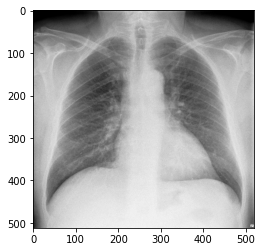

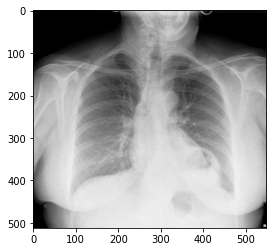

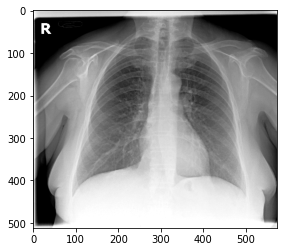

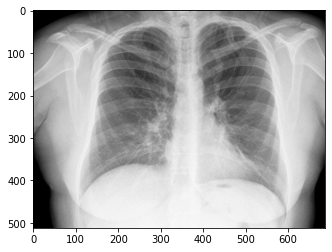

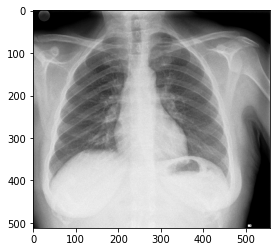

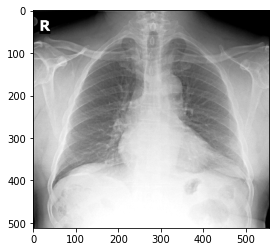

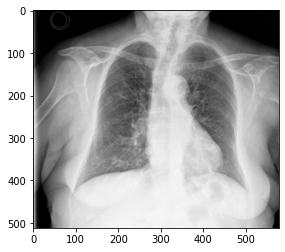

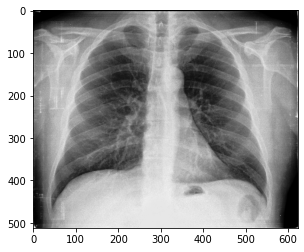

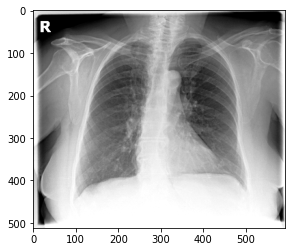

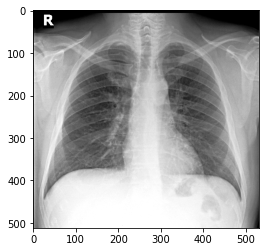

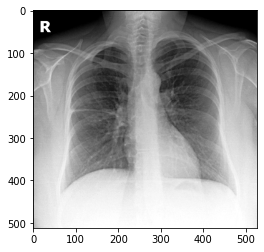

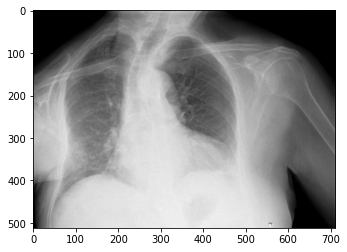

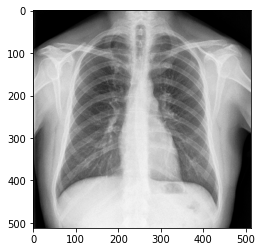

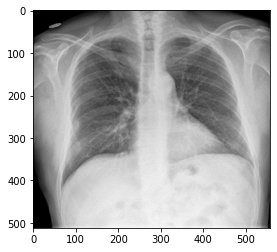

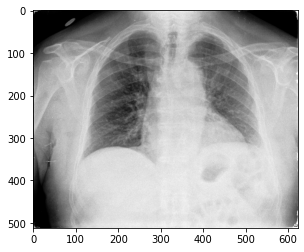

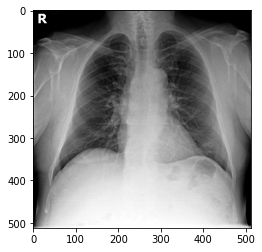

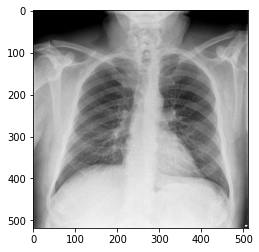

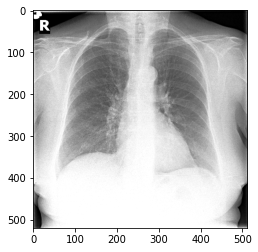

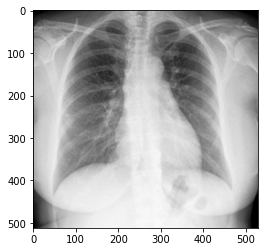

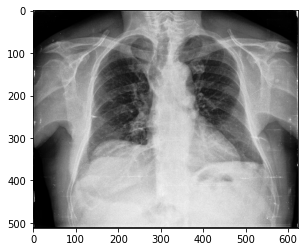

In [ ]:
# Revisamos que las imágenes que vayamos a usar se encuentren bien etiquetadas.
for index, row in PA_20.iterrows():
  path_read = '/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/DS_comp_nodef/' + row["ImageID"]
  plt.figure()
  imagen = imread(path_read)
  plt.imshow(imagen[:,:,1],cmap=plt.cm.Greys_r)
  #print('Ground Truth: '+ APh_20["Projection"].values[ROW]+'\n')

## Tomamos imágenes L 

In [ ]:
L_df = df_train.loc[df_train['Projection'] == 'L'] 
L_df

Unnamed: 0  ... Projection
4               4  ...          L
9               9  ...          L
12             12  ...          L
13             13  ...          L
18             18  ...          L
...           ...  ...        ...
17416       17416  ...          L
17421       17421  ...          L
17422       17422  ...          L
17424       17424  ...          L
17429       17429  ...          L

[5706 rows x 4 columns]

In [ ]:
L_20 = L_df.sample(n=20)
L_20

Unnamed: 0  ... Projection
16323       16323  ...          L
8448         8448  ...          L
16677       16677  ...          L
11962       11962  ...          L
2867         2867  ...          L
13317       13317  ...          L
15140       15140  ...          L
10185       10185  ...          L
5071         5071  ...          L
1707         1707  ...          L
7213         7213  ...          L
9271         9271  ...          L
16111       16111  ...          L
11403       11403  ...          L
11926       11926  ...          L
10597       10597  ...          L
6185         6185  ...          L
15605       15605  ...          L
9504         9504  ...          L
1610         1610  ...          L

[20 rows x 4 columns]

KeyboardInterrupt: ignored

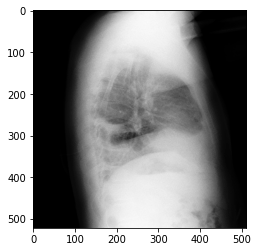

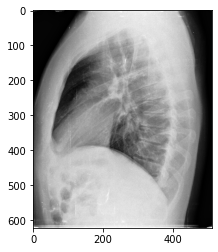

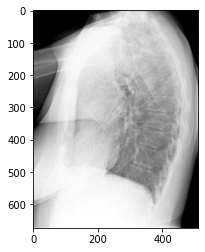

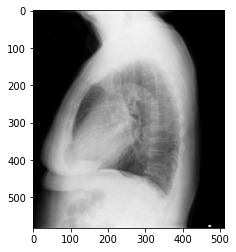

<Figure size 432x288 with 0 Axes>

In [ ]:
for index, row in L_20.iterrows():
  path_read = '/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/DS_comp_nodef/' + row["ImageID"]
  plt.figure()
  imagen = imread(path_read)
  plt.imshow(imagen[:,:,1],cmap=plt.cm.Greys_r)
  #print('Ground Truth: '+ APh_20["Projection"].values[ROW]+'\n')

## Tomamos imágenes AP_h

In [ ]:
APh_df = df_train.loc[df_train['Projection'] == 'AP_horizontal'] 
APh_df

ImageID     Projection
26    4/286169633034596533207586178311316212282_j51h...  AP_horizontal
29    7/118770727299037375036263127485192008864_vz5w...  AP_horizontal
64    4/330288557977063360025136616474484990880_-5bl...  AP_horizontal
95    0/318086149697052829271543112791466683829_vwhd...  AP_horizontal
100   2/123712523100765794645614847095842998737_ww81...  AP_horizontal
...                                                 ...            ...
1680  0/21622763272843446438588439312086001028_2h8di...  AP_horizontal
1700  7/64004059739464758343561280022754186282_2wagh...  AP_horizontal
1753  5/119777270630252129092224435609175000360_6vf7...  AP_horizontal
1766  0/148808555610197866737270919680299101805_o7n5...  AP_horizontal
1769  0/250538383336488089851272840069475450672_7ebt...  AP_horizontal

[90 rows x 2 columns]

In [ ]:
APh_20 = APh_df.sample(n=20)
APh_20

ImageID     Projection
727   5/231969939532557030804928038748143359750_2_rh...  AP_horizontal
1092  5/50542036180306227702402727079122326015_dincn...  AP_horizontal
624   6/283259706623662939553700512914435735471_7e02...  AP_horizontal
210   4/219774689872399980981022253022147769163_2_l8...  AP_horizontal
326   7/180496455270990804585400695026823497506_z9ih...  AP_horizontal
671   0/152578842912245459030702367323123419528_2_0q...  AP_horizontal
663   7/76513127719686435364473705219195140474_98ia2...  AP_horizontal
921   5/206385080967364591572548895312312178682_4nih...  AP_horizontal
1308  2/108024141995303850873030711771860111788_f1i0...  AP_horizontal
260   3/80892103765298639179355367939072990569_5we57...  AP_horizontal
1212  2/263616054472400143496055926781341772722_ejyi...  AP_horizontal
997   7/269386373475571283807707255823628336214_rb6c...  AP_horizontal
1299  4/32774732091504826672989904671953153241_1pp28...  AP_horizontal
1434  7/256147461567021768242019164610152996079-4_0h...  AP_horizontal
200   3/332930284364188157784817132419812957739_2_fo...  AP_horizontal
474   5/46648248924195590055502779116843598696_t5kev...  AP_horizontal
1570  5/280674558173639782820818257817573831888_opcu...  AP_horizontal
392   0/133366959714202786380043498487399521163_4fgk...  AP_horizontal
26    4/286169633034596533207586178311316212282_j51h...  AP_horizontal
1473  3/16742654447337329545240810239863888745_2_9l4...  AP_horizontal

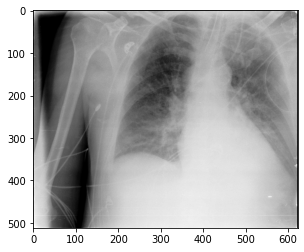

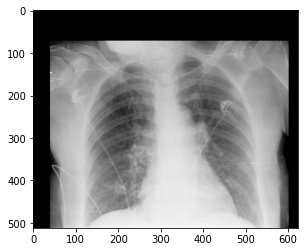

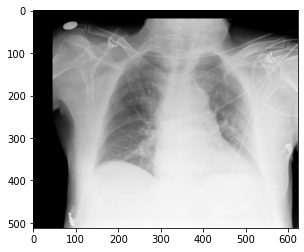

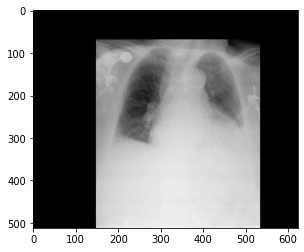

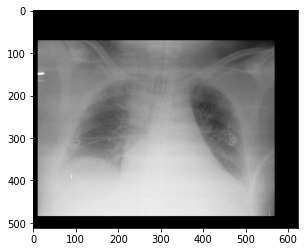

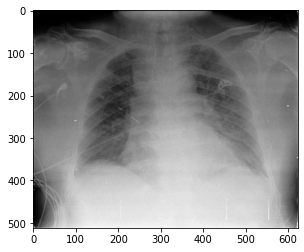

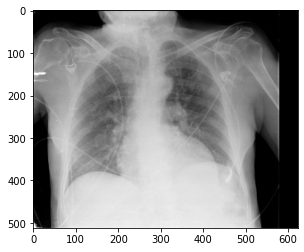

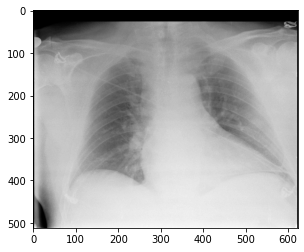

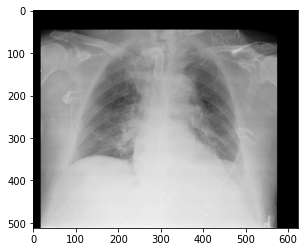

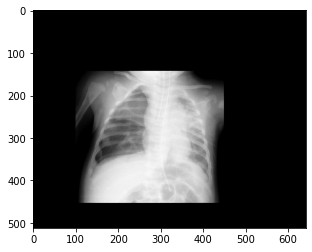

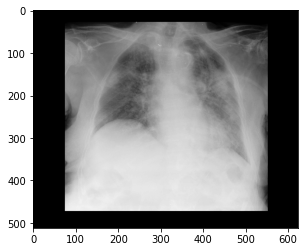

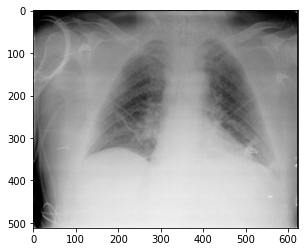

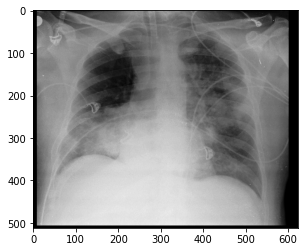

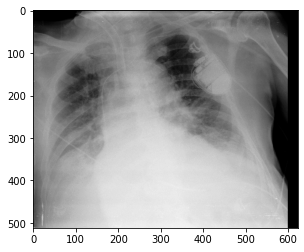

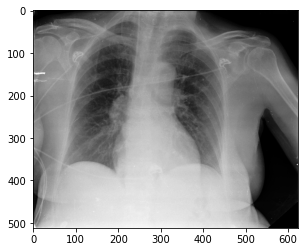

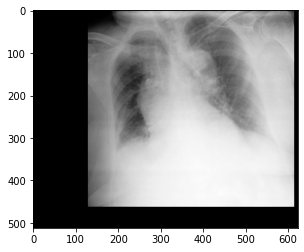

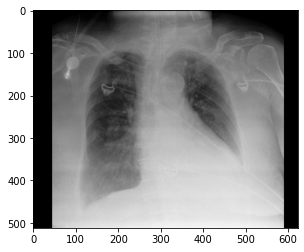

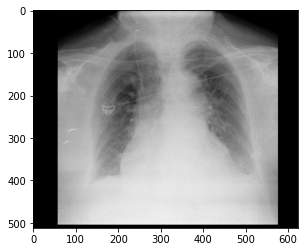

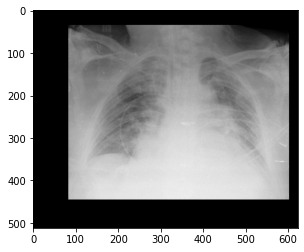

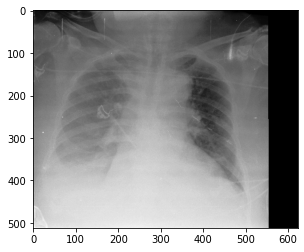

In [ ]:
for index, row in APh_20.iterrows():
  path_read = '/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/DS_comp_nodef/' + row["ImageID"]
  plt.figure()
  imagen = imread(path_read)
  plt.imshow(imagen[:,:,1],cmap=plt.cm.Greys_r)
  #print('Ground Truth: '+ APh_20["Projection"].values[ROW]+'\n')

##Concatenamos y Guardamos

In [ ]:
s20_df = pd.concat([PA_20, L_20, APh_20])
s20_df

ImageID     Projection
1371  1/58306017006945754446277618845324178321_ml4xw...             PA
1633  2/24172542304474387232362744623755234934_x7fca...             PA
1309  4/239786077803334233176769097529623721105_2_vh...             PA
1089  3/286618087603253413253659974601588632723_6r67...             PA
882   2/321956562134190997249011971644620627879_pgbs...             PA
225   7/64010987757113311188477319058510127795_uhqql...             PA
1626  0/233202571007896468640039430513757759224_878g...             PA
1188  5/309825252381642289575259797763261816840_lfpq...             PA
377   3/209259389550926441729241739796844356144_di8t...             PA
954   3/255474178290399456081769959183399359390_qt9o...             PA
1063  6/293066557361398563787176095659856406990_mqmc...             PA
1307  5/202534082636596470065331988488726632893_w387...             PA
368   4/169632385654436838908372257983342217197_vtub...             PA
985   3/88417106681724556062448257945738428702_5qztm...             PA
1062  7/73716946334984550805271160265186275219_juz16...             PA
570   3/328483568345905472936813349787026840965_sw2j...             PA
1403  0/126285693481594194255244003469424468073_fk3y...             PA
1231  0/232538572936349033119391992225488992653_qlcz...             PA
214   2/108649002010545187308127342016048932200_qzjn...             PA
408   4/48296714751426622210848115417696716439_evfz8...             PA
1774  4/337362040087961836225924527526391424669_qy74...              L
697   0/313827364452531661330025984234136435818_5k60...              L
1722  0/158127965063113306992304369857531130990_6hpu...              L
198   2/70158017463755750194941279877145533585_sdzrm...              L
1250  4/87054857490246991263619872462266062078_y9lan...              L
1499  4/244855916439834919996874660376379004373_d1ws...              L
1178  5/64550046317670683092124225544892969611_fhb60...              L
43    4/204111647772535252016621731006141696493_da7z...              L
120   5/143995745737064565266633840356750650163_yd4l...              L
1261  3/288745458124741489037822821073674992311_4o7e...              L
604   1/43977068427359067502836471650954197674_ykgb1...              L
498   1/13489016033396205963125693115200264909_bhqr4...              L
1166  4/233966217429259944028369174893672309030_go58...              L
557   5/19467767735516935687644067253699300456_vmpob...              L
831   3/197127572062828437501384515648192402883_5znk...              L
828   6/269810828975397326410884114457790875929_qzim...              L
867   7/101651367393208371957602619301341709589_6a2u...              L
514   6/207848817683321671211546429872059662498_quxm...              L
702   3/171766980876975733488381740945496977817_d35g...              L
730   3/212670653869102736403169559555949358934_e5wt...              L
727   5/231969939532557030804928038748143359750_2_rh...  AP_horizontal
1092  5/50542036180306227702402727079122326015_dincn...  AP_horizontal
624   6/283259706623662939553700512914435735471_7e02...  AP_horizontal
210   4/219774689872399980981022253022147769163_2_l8...  AP_horizontal
326   7/180496455270990804585400695026823497506_z9ih...  AP_horizontal
671   0/152578842912245459030702367323123419528_2_0q...  AP_horizontal
663   7/76513127719686435364473705219195140474_98ia2...  AP_horizontal
921   5/206385080967364591572548895312312178682_4nih...  AP_horizontal
1308  2/108024141995303850873030711771860111788_f1i0...  AP_horizontal
260   3/80892103765298639179355367939072990569_5we57...  AP_horizontal
1212  2/263616054472400143496055926781341772722_ejyi...  AP_horizontal
997   7/269386373475571283807707255823628336214_rb6c...  AP_horizontal
1299  4/32774732091504826672989904671953153241_1pp28...  AP_horizontal
1434  7/256147461567021768242019164610152996079-4_0h...  AP_horizontal
200   3/332930284364188157784817132419812957739_2_fo...  AP_horizontal
474   5/46648248924195590055502779116843598696_t5kev...  AP_horizontal
1

In [ ]:
s20_df = s20_df.sample(frac=1)
s20_df

ImageID     Projection
1570  5/280674558173639782820818257817573831888_opcu...  AP_horizontal
1178  5/64550046317670683092124225544892969611_fhb60...              L
408   4/48296714751426622210848115417696716439_evfz8...             PA
120   5/143995745737064565266633840356750650163_yd4l...              L
1473  3/16742654447337329545240810239863888745_2_9l4...  AP_horizontal
326   7/180496455270990804585400695026823497506_z9ih...  AP_horizontal
882   2/321956562134190997249011971644620627879_pgbs...             PA
1231  0/232538572936349033119391992225488992653_qlcz...             PA
1092  5/50542036180306227702402727079122326015_dincn...  AP_horizontal
26    4/286169633034596533207586178311316212282_j51h...  AP_horizontal
1063  6/293066557361398563787176095659856406990_mqmc...             PA
198   2/70158017463755750194941279877145533585_sdzrm...              L
377   3/209259389550926441729241739796844356144_di8t...             PA
498   1/13489016033396205963125693115200264909_bhqr4...              L
368   4/169632385654436838908372257983342217197_vtub...             PA
210   4/219774689872399980981022253022147769163_2_l8...  AP_horizontal
474   5/46648248924195590055502779116843598696_t5kev...  AP_horizontal
604   1/43977068427359067502836471650954197674_ykgb1...              L
200   3/332930284364188157784817132419812957739_2_fo...  AP_horizontal
1062  7/73716946334984550805271160265186275219_juz16...             PA
214   2/108649002010545187308127342016048932200_qzjn...             PA
702   3/171766980876975733488381740945496977817_d35g...              L
671   0/152578842912245459030702367323123419528_2_0q...  AP_horizontal
1434  7/256147461567021768242019164610152996079-4_0h...  AP_horizontal
1212  2/263616054472400143496055926781341772722_ejyi...  AP_horizontal
225   7/64010987757113311188477319058510127795_uhqql...             PA
1308  2/108024141995303850873030711771860111788_f1i0...  AP_horizontal
1188  5/309825252381642289575259797763261816840_lfpq...             PA
1307  5/202534082636596470065331988488726632893_w387...             PA
1371  1/58306017006945754446277618845324178321_ml4xw...             PA
514   6/207848817683321671211546429872059662498_quxm...              L
867   7/101651367393208371957602619301341709589_6a2u...              L
997   7/269386373475571283807707255823628336214_rb6c...  AP_horizontal
1633  2/24172542304474387232362744623755234934_x7fca...             PA
1261  3/288745458124741489037822821073674992311_4o7e...              L
557   5/19467767735516935687644067253699300456_vmpob...              L
260   3/80892103765298639179355367939072990569_5we57...  AP_horizontal
1250  4/87054857490246991263619872462266062078_y9lan...              L
828   6/269810828975397326410884114457790875929_qzim...              L
921   5/206385080967364591572548895312312178682_4nih...  AP_horizontal
1722  0/158127965063113306992304369857531130990_6hpu...              L
1166  4/233966217429259944028369174893672309030_go58...              L
1403  0/126285693481594194255244003469424468073_fk3y...             PA
570   3/328483568345905472936813349787026840965_sw2j...             PA
43    4/204111647772535252016621731006141696493_da7z...              L
624   6/283259706623662939553700512914435735471_7e02...  AP_horizontal
1089  3/286618087603253413253659974601588632723_6r67...             PA
392   0/133366959714202786380043498487399521163_4fgk...  AP_horizontal
697   0/313827364452531661330025984234136435818_5k60...              L
1626  0/233202571007896468640039430513757759224_878g...             PA
730   3/212670653869102736403169559555949358934_e5wt...              L
954   3/255474178290399456081769959183399359390_qt9o...             PA
1499  4/244855916439834919996874660376379004373_d1ws...              L
1299  4/32774732091504826672989904671953153241_1pp28...  AP_horizontal
727   5/231969939532557030804928038748143359750_2_rh...  AP_horizontal
831   3/197127572062828437501384515648192402883_5znk...              L
6

In [ ]:
s20_df.to_excel("train_20imgs.xlsx")

# 40 imágenes por clase, balanceadas (33% cada clase)

Queremos ver si somos capaces de generar un modelo que consiga clasificar con 20 imágenes de cada clase.

##Importamos DF

In [7]:
# Importamos todo el DS de train.
df_train =df4[['ImageID','Projection']]
df_train

ImageID     Projection
0      0/209046467925082585123438173056951670828_2yf7...             PA
1      1/317153195138727022241940825334565644346_pm1t...             PA
2      1/157752956223429585284471889321633028328_s661...             PA
3      2/116049923418608239865298302562509374260_5i35...  AP_horizontal
4      1/335059767833946941543878820205593617354_h5pe...              L
...                                                  ...            ...
17433  6/109629994783055558159663901799709452741_lp06...             PA
17434  4/17550048962462292354390950562258261629_4enke...             PA
17435  5/221707020021396800591902578337530315742_vh7j...             PA
17436  1/194600924615827283147265593297145671589_z7g8...             PA
17437  7/100561652375041207062567763962600953431_fq4x...             PA

[17438 rows x 2 columns]

##Tomamos imágenes PA

In [8]:
PA_df = df_train.loc[df_train['Projection'] == 'PA'] 


In [9]:
PA_df

ImageID Projection
0      0/209046467925082585123438173056951670828_2yf7...         PA
1      1/317153195138727022241940825334565644346_pm1t...         PA
2      1/157752956223429585284471889321633028328_s661...         PA
5      1/163206744647345735638008384496142793776_so9d...         PA
6      2/319691009842256194886384234728532983016_wbxt...         PA
...                                                  ...        ...
17433  6/109629994783055558159663901799709452741_lp06...         PA
17434  4/17550048962462292354390950562258261629_4enke...         PA
17435  5/221707020021396800591902578337530315742_vh7j...         PA
17436  1/194600924615827283147265593297145671589_z7g8...         PA
17437  7/100561652375041207062567763962600953431_fq4x...         PA

[10862 rows x 2 columns]

In [11]:
# Tomamos 20 imágenes 
PA_40 = PA_df.sample(n=40)
PA_40

ImageID Projection
6367   1/235389214263218836736803315615511492270_m5ib...         PA
643    1/115787984654334817312333292254894810289_8oqb...         PA
7850   5/296138760445452211249694378820866957741_u920...         PA
10664  4/2186034170636822741874843759971169161_phbb8x...         PA
12717  2/3911975379644228521936428270682966507_gpq1cy...         PA
14371  6/158418209508576754148273221794955345248_hfym...         PA
16485  5/304262694351095144416428961047034701691_jjjh...         PA
7579   3/98946920407128280903519580328454092493_7oxl7...         PA
2042   1/5238741060722781588772210333697830475_5id08w...         PA
4408   2/103193600682270172871885584717965007435_xmhb...         PA
5023   1/311840846453371971454398286258023885367_aj60...         PA
1954   3/2613138674713522536839593252337143713_4_boq7...         PA
0      0/209046467925082585123438173056951670828_2yf7...         PA
10166  5/263699283011461413222074761664046032985_g2rw...         PA
2699   6/313142315493165711857933356128075736989_l3c2...         PA
16779  2/31500244418074836726963140352009239505_jzlod...         PA
512    2/95492521472804121201715541210855779064_5hsq4...         PA
466    5/261079818357820127399167600022027772341_csd4...         PA
10264  0/46591472320460707773163700942754844555-2_hm3...         PA
8279   3/16937861318334534743642456498109040660_na39m...         PA
16645  7/320326241965049833994613387132178036051_2_by...         PA
11931  5/26232155195795993829816386148570101061_mbc1l...         PA
14587  3/206776152625618230290351492605928832398_3ywz...         PA
13431  0/268205918191907829962236147945722405203_s9td...         PA
4681   7/87212127028041534208126541024139200347_598tt...         PA
5190   0/285290386711761684769273546462266756930_bhjy...         PA
5312   7/334665977968544002373364970436303922413_qmf7...         PA
8203   3/258730342437166316892763602833700800837_r7fn...         PA
14584  0/184491195955037755020328328616678469225_1dpw...         PA
3981   0/182153357033863986819477081579951131676_yetg...         PA
7962   4/78596023008186681465603603740461954482_ybkc8...         PA
10402  4/269336963566959196847410239545725959864_6768...         PA
11787  3/195002986812644235830457746776895554901_uf1g...         PA
3553   6/31563938470836947372270271543298114211_t42fl...         PA
12816  6/139373399684024433144558432208470147564_tfwg...         PA
16533  7/168096459266405502291573516505300345980_dnij...         PA
16789  5/226654505852244716130340107624074214392_9x3h...         PA
251    4/127029925252152816441466772690110541990_wwbl...         PA
13122  2/180569879086442890732497432449556320873_o1sn...         PA
2620   1/138006330926785639118378175413114441051_6ku1...         PA

In [12]:
# Revisamos que las imágenes que vayamos a usar se encuentren bien etiquetadas.
for index, row in PA_40.iterrows():
  path_read = '/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/DS_comp_nodef/' + row["ImageID"]
  plt.figure()
  imagen = imread(path_read)
  plt.imshow(imagen[:,:,1],cmap=plt.cm.Greys_r)
  #print('Ground Truth: '+ APh_20["Projection"].values[ROW]+'\n')

Output hidden; open in https://colab.research.google.com to view.

## Tomamos imágenes L 

In [13]:
L_df = df_train.loc[df_train['Projection'] == 'L'] 
L_df

ImageID Projection
4      1/335059767833946941543878820205593617354_h5pe...          L
9      7/57699843972043494501905391908644975466_mzsxn...          L
12     5/322063069776874464195948988310466174649_coen...          L
13     0/74138041746990991750354395922476361801_lsg2x...          L
18     7/199453333534658074562461001777240064253_959x...          L
...                                                  ...        ...
17416  4/233223398692432434077852877397207847834_331h...          L
17421  0/151778749555877195477870831957511926915_k529...          L
17422  5/245638682429920168618404171961359275207_gf3q...          L
17424  5/70049313333934726426356905619959274694-2_51o...          L
17429  6/207848817683321671211546429872059662498_quxm...          L

[5706 rows x 2 columns]

In [14]:
L_40 = L_df.sample(n=40)
L_40

ImageID Projection
17141  1/74234944498804111106577318785690007521_j34td...          L
9211   3/279706872314715245585202872623233111678_hxks...          L
7272   2/123993986741591681565679497727726873199_t56w...          L
9647   7/276230866546214343969935450091709195754_c2of...          L
3318   5/295863131810355252498853502963897689507_2_51...          L
528    5/318427475637740351167185977670007367806_5x5s...          L
4821   5/194788537530780197654387014647599129511_s84n...          L
10735  4/86941824688778119907526255354779689502_trf8g...          L
9094   1/141115202306305467089195855978646405759_fry1...          L
7735   6/121857688398504337633816522898286493892_fic5...          L
10995  3/144928919681319436255357319507315938605_y1i0...          L
13878  5/179114609611076233972958934514280938021_ts24...          L
13128  6/153991089273682316515448328455753029029_3pi7...          L
8016   2/119540480736145663936291733454067740457_tfbk...          L
6233   4/2203321464441497876319349802221796247_c8vvub...          L
4942   2/36280391467082748450639043342008373492_b5mrg...          L
652    3/49037610718489936216120626183583863991_3egdf...          L
544    6/223532675372625928937780697281369538081_5g5c...          L
2955   4/37740876789768112273078514063158003968_204g9...          L
3907   6/76361298668216951046980971548719680182_j9m6b...          L
4744   2/299399970530502425973486525677861601366_atyi...          L
2946   4/132460179550110248857668323722654776881_2_xl...          L
4702   3/44469426744197617663551486475270991664_znact...          L
6430   0/183738202140091190891389171503176288273_d7sq...          L
992    1/37489409071068283967343965016838577287_ode8j...          L
13492  0/159068920744014579732054248805200438850_et4f...          L
5054   4/161186585087011000241106531689754013989_iu2w...          L
9899   4/306316017114658767543665023573371253282_bvyq...          L
8659   0/27466582138777909313989770931560888017_ueljp...          L
2169   0/144558012307433706624051610322658765161_q5mo...          L
3276   3/224315024175610295701878153655547839462_8fhm...          L
10618  2/257634638264284497483142785248182260821_l6pg...          L
6447   7/199143818389856934032876040502299665305_bjof...          L
9114   6/102546495463882918344282366283084399647_2_kf...          L
1852   5/168117662723632449902317048273934576258_2_m3...          L
2784   5/27681403068857363143441830125468517689_fqzdu...          L
14470  2/65483521611755484514877471370997559846_0hs3u...          L
9076   2/272789295255736367100224206431296764538_1o88...          L
11425  2/193469372451526355641159204267483544472_b5vs...          L
3206   0/110197446456814343356996631403599875033_zo9o...          L

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


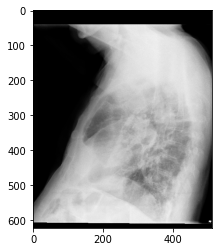

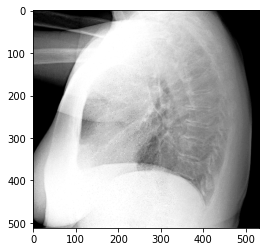

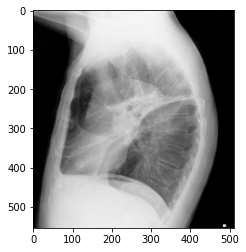

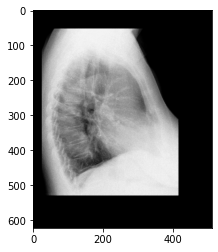

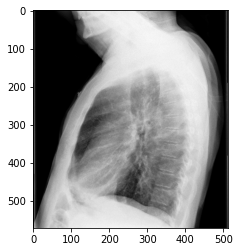

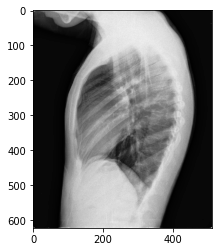

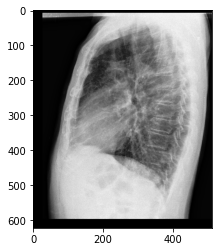

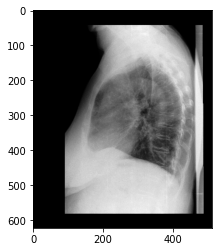

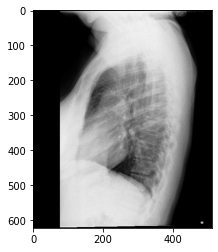

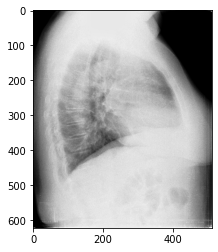

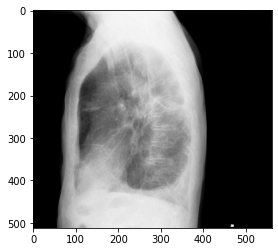

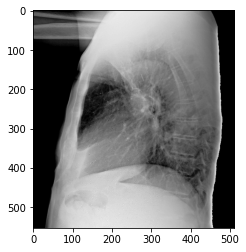

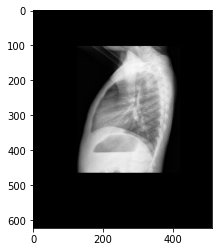

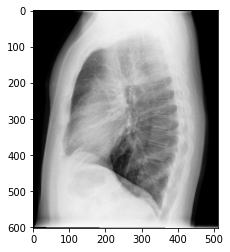

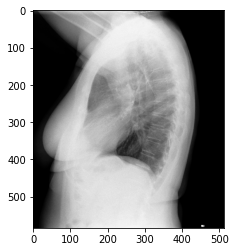

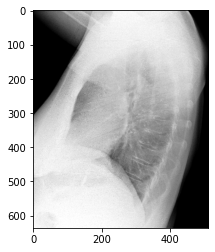

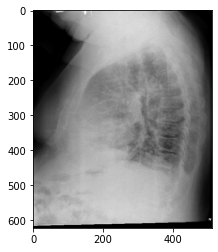

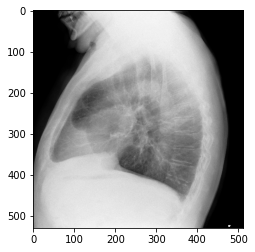

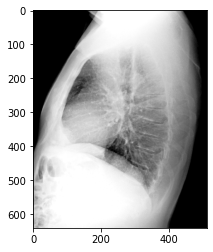

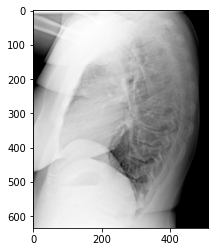

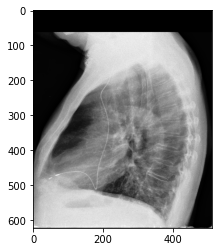

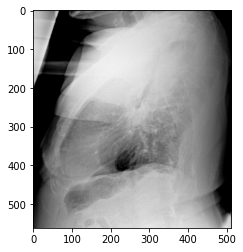

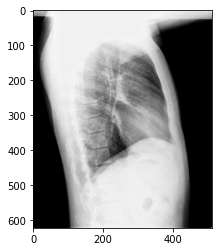

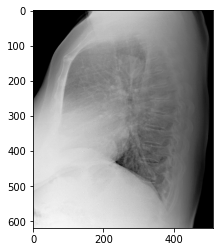

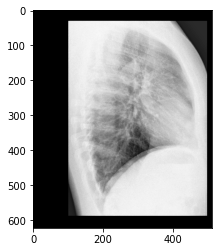

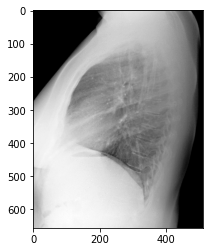

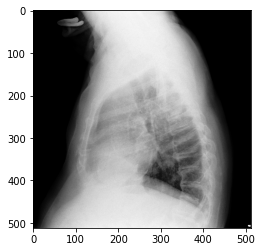

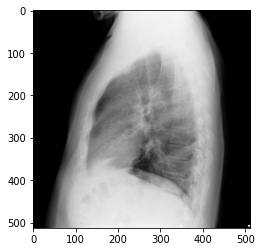

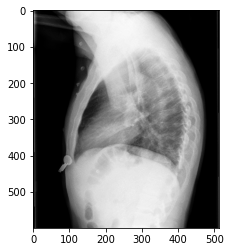

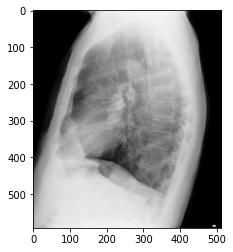

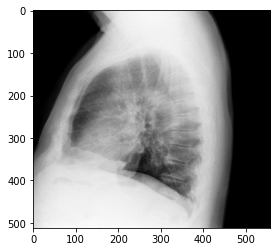

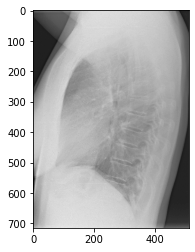

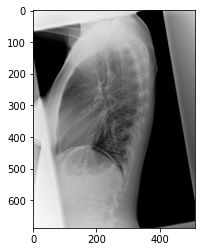

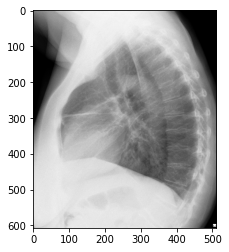

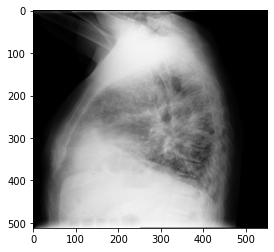

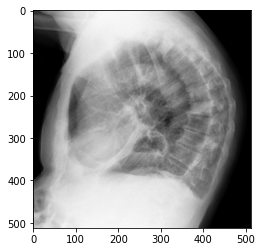

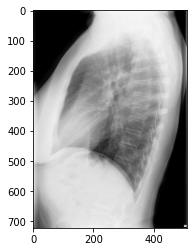

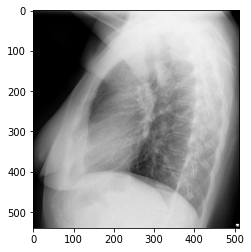

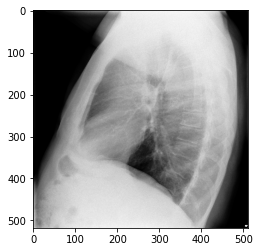

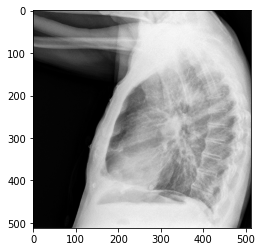

In [15]:
for index, row in L_40.iterrows():
  path_read = '/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/DS_comp_nodef/' + row["ImageID"]
  plt.figure()
  imagen = imread(path_read)
  plt.imshow(imagen[:,:,1],cmap=plt.cm.Greys_r)
  #print('Ground Truth: '+ APh_20["Projection"].values[ROW]+'\n')

## Tomamos imágenes AP_h

In [16]:
APh_df = df_train.loc[df_train['Projection'] == 'AP_horizontal'] 
APh_df

ImageID     Projection
3      2/116049923418608239865298302562509374260_5i35...  AP_horizontal
28     7/111981673634469383942208250996954635872_c3o3...  AP_horizontal
63     3/236776929550912271227119521443059674838_b1f8...  AP_horizontal
80     5/255839752323152386741570763142808967696_i6ig...  AP_horizontal
93     7/157926281944622538754880353319693477325_t490...  AP_horizontal
...                                                  ...            ...
17372  6/110852635720648409041317413922300260840_uma6...  AP_horizontal
17377  7/202611333652346098763109742702447728032_1wjc...  AP_horizontal
17387  1/244262536120356661254896411676982510248_39rp...  AP_horizontal
17420  3/11139128914851808986042721445377542798-2_w3w...  AP_horizontal
17423  7/256147461567021768242019164610152996079_10_f...  AP_horizontal

[870 rows x 2 columns]

In [17]:
APh_40 = APh_df.sample(n=40)
APh_40

ImageID     Projection
4845   3/116628959477081742978442430597057801478_1dgc...  AP_horizontal
12125  2/196847433210599353769333349527283145543_-fcv...  AP_horizontal
11183  2/125836230646419446782863581279396475124_v7x6...  AP_horizontal
14545  7/46148959854060112449526530660205455487-4_9g3...  AP_horizontal
7359   2/256999655604230357146225409237970721420_3w18...  AP_horizontal
11248  7/166192490017200896203298339196963052664_pq65...  AP_horizontal
1278   3/241719717146773909281792490518844407604_bwj8...  AP_horizontal
10270  0/331616139064884827624177940822193811204_6cj3...  AP_horizontal
1913   2/215486011810858055899788142741043610226-3_9l...  AP_horizontal
8935   2/87023053241010498597892611938516510979_yt69l...  AP_horizontal
6741   2/22361225175230598543923506684163248777_ewfri...  AP_horizontal
1441   5/148090131247117006422030514487762254254_es5l...  AP_horizontal
639    5/227099642533941438698803821179008675449_q0jm...  AP_horizontal
12495  5/141979234934997411417196716532667215294_pm20...  AP_horizontal
8351   2/117384183968242249846710717313708233647_ytkq...  AP_horizontal
1210   2/123716867692299523460037833663267707226_0ba6...  AP_horizontal
2454   0/31246739765141614790589233061520642497-3_zgx...  AP_horizontal
5485   5/227095935223126382490229736332994547887_rglh...  AP_horizontal
16593  7/80740258222134135887676247588862532539_pmwfl...  AP_horizontal
15355  6/185768679072471038983086969991570012079_9f7h...  AP_horizontal
1200   3/164156067422070940086976163445573493342_vyvj...  AP_horizontal
9387   3/121252504268112954522247970562212129594_2_s4...  AP_horizontal
10502  1/115936027324234712648894556198545011180_7lil...  AP_horizontal
10464  1/272080647365937468100347564121849376317_k1mg...  AP_horizontal
9326   4/91540992804926115774078410756113398418_n487x...  AP_horizontal
12962  3/117101222168414530854929692680919634739_6389...  AP_horizontal
11944  3/309598742672070734658922863244172462018-2_zw...  AP_horizontal
1527   1/310192940807894033580733474546994190251_vc0c...  AP_horizontal
2129   2/328076300700126268512062682085944068093_szmy...  AP_horizontal
3534   2/226238381533808952115028940559464032526_-gft...  AP_horizontal
4965   0/202702709757915428900100155337275062762_lqqw...  AP_horizontal
8054   2/101991612320249193176205024735415183351_17_b...  AP_horizontal
3742   4/264316719863485276840142570963759310926_57mz...  AP_horizontal
11737  0/64525397459716262309884785089676208887_a4yy3...  AP_horizontal
10634  0/54500766011795456126459072406676505967_3fqsa...  AP_horizontal
14089  2/307195773412444459258169392741015936574_j0ql...  AP_horizontal
2115   2/101991612320249193176205024735415183351_5_bz...  AP_horizontal
2870   4/165667696021525174188861612663514777372_y78z...  AP_horizontal
11279  5/56548960219674265255449155377628950080-4_9ha...  AP_horizontal
4579   7/199615367726260760670562102634743704048_o1my...  AP_horizontal

In [18]:
for index, row in APh_40.iterrows():
  path_read = '/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/DS_comp_nodef/' + row["ImageID"]
  plt.figure()
  imagen = imread(path_read)
  plt.imshow(imagen[:,:,1],cmap=plt.cm.Greys_r)
  #print('Ground Truth: '+ APh_20["Projection"].values[ROW]+'\n')

Output hidden; open in https://colab.research.google.com to view.

##Concatenamos y Guardamos

In [19]:
s40_df = pd.concat([PA_40, L_40, APh_40])
s40_df

ImageID     Projection
6367   1/235389214263218836736803315615511492270_m5ib...             PA
643    1/115787984654334817312333292254894810289_8oqb...             PA
7850   5/296138760445452211249694378820866957741_u920...             PA
10664  4/2186034170636822741874843759971169161_phbb8x...             PA
12717  2/3911975379644228521936428270682966507_gpq1cy...             PA
...                                                  ...            ...
14089  2/307195773412444459258169392741015936574_j0ql...  AP_horizontal
2115   2/101991612320249193176205024735415183351_5_bz...  AP_horizontal
2870   4/165667696021525174188861612663514777372_y78z...  AP_horizontal
11279  5/56548960219674265255449155377628950080-4_9ha...  AP_horizontal
4579   7/199615367726260760670562102634743704048_o1my...  AP_horizontal

[120 rows x 2 columns]

In [20]:
s40_df = s40_df.sample(frac=1)
s40_df

ImageID     Projection
15355  6/185768679072471038983086969991570012079_9f7h...  AP_horizontal
5054   4/161186585087011000241106531689754013989_iu2w...              L
5312   7/334665977968544002373364970436303922413_qmf7...             PA
11183  2/125836230646419446782863581279396475124_v7x6...  AP_horizontal
2620   1/138006330926785639118378175413114441051_6ku1...             PA
...                                                  ...            ...
10166  5/263699283011461413222074761664046032985_g2rw...             PA
6430   0/183738202140091190891389171503176288273_d7sq...              L
12125  2/196847433210599353769333349527283145543_-fcv...  AP_horizontal
8203   3/258730342437166316892763602833700800837_r7fn...             PA
3206   0/110197446456814343356996631403599875033_zo9o...              L

[120 rows x 2 columns]

In [21]:
s40_df.to_excel("train_40imgs.xlsx")